In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as torch_F
from jetbotData import get_train_val_dataloader
from torch import optim
import matplotlib.pyplot as plt
import numpy as np

In [45]:
label_colors = {
            0: np.array([0,0,0]),   # black -> background
            1: np.array([128,0,0]),   # dark red -> road
            2: np.array([0,128,0]),   # light green -> landmark solid
            3: np.array([128,128,0])  # green -> landmark dashed
        }
def label_to_rgb_image(label_image):
    # Create an empty label image with the same height and width as the input image
    height, width, _ = label_image.shape
    rgb_image = np.ones((height, width, 3))
    

    mask = np.all(label_image == [0,0,0,1], axis=-1)
    # Assign the label to the mask
    rgb_image[mask] = [0.5,0.5,0]

    mask = np.all(label_image == [0,0,1,0], axis=-1)
    # Assign the label to the mask
    rgb_image[mask] = [0,0.5,0.5]

    mask = np.all(label_image == [0,1,0,0], axis=-1)
    # Assign the label to the mask
    rgb_image[mask] = [0.5,0,0]

    mask = np.all(label_image == [1,0,0,0], axis=-1)
    # Assign the label to the mask
    rgb_image[mask] = [0,0,0]

    # Loop through each color and assign the corresponding label
    # for label, color in label_colors.items():
    #     # Create a mask for the current color
    #     mask = np.all(label_image == [0,0,0,1], axis=-1)
    #     # Assign the label to the mask
    #     rgb_image[mask] = [0,0,0]

    return rgb_image

dataset size: {'train': 2, 'val': 1}
torch.Size([2, 3, 224, 220])
(224, 220, 3)
(224, 220, 3)
(224, 220, 4)
(224, 220, 3)


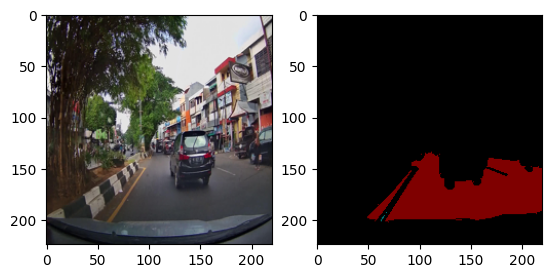

In [46]:
import matplotlib.pyplot as plt
import numpy as np
dataloaders, dataset_size = get_train_val_dataloader(2,0, type="roadlane")

train_dataloader = dataloaders["train"]
val_dataloader = dataloaders["val"]

print("dataset size:", dataset_size)
for iter, batch in enumerate(train_dataloader):
    X = batch["img"]
    y = batch["seg_rgb"]
    z = batch["label"]
    if iter == 0:
        print(y.shape)
        img = X[0]
        seg_img  = y[0]
        label_img = z[0]
        # print(img.shape)
        img = img.cpu().detach().numpy()
        seg_img = seg_img.cpu().detach().numpy()
        label_img = label_img.cpu().detach().numpy()

        img = np.transpose(img, (1,2,0))
        seg_img = np.transpose(seg_img, (1, 2, 0))
        label_img = np.transpose(label_img, (1, 2, 0))
        seg_rgb_img = label_to_rgb_image(label_img)

        print(img.shape)
        print(seg_img.shape)
        print(label_img.shape)
        print(seg_rgb_img.shape)
        # img = np.fliplr(img)
        plt.subplot(1,2,1)
        plt.imshow(img)
        plt.subplot(1,2,2)
        # plt.imshow(seg_img)
        # plt.subplot(1,3,3)
        plt.imshow(seg_rgb_img)

dataset size: {'train': 2, 'val': 2}
torch.Size([2, 3, 224, 220])
(224, 220, 3)
(224, 220, 4)
(224, 220, 3)


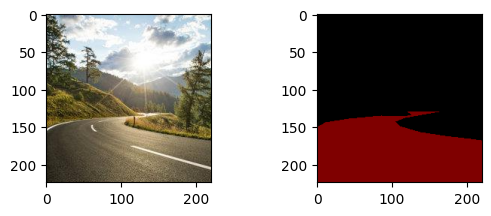

In [47]:

dataloaders, dataset_size = get_train_val_dataloader(2,0, type="labelme")

train_dataloader = dataloaders["train"]
val_dataloader = dataloaders["val"]

print("dataset size:", dataset_size)
for iter, batch in enumerate(train_dataloader):
    X = batch["img"]
    z = batch["label"]
    if iter == 0:
        print(y.shape)
        img = X[0]
        label_img = z[0]
        # print(img.shape)
        img = img.cpu().detach().numpy()
        label_img = label_img.cpu().detach().numpy()

        img = np.transpose(img, (1,2,0))
        label_img = np.transpose(label_img, (1, 2, 0))
        seg_rgb_img = label_to_rgb_image(label_img)

        print(img.shape)
        print(label_img.shape)
        print(seg_rgb_img.shape)
        # img = np.fliplr(img)
        plt.subplot(2,2,1)
        plt.imshow(img)
        plt.subplot(2,2,2)
        plt.imshow(seg_rgb_img)